In [7]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D
import sys

In [8]:

# Get the current working directory
current_dir = os.getcwd()

# Navigate to 'network_simulations'
parent_dir = os.path.abspath(os.path.join(current_dir, ".."))

# Navigate to the sibling directory '00_opinion_function_setup'
sibling_dir = os.path.join(parent_dir, "00_opinion_function_setup")

# Add the sibling directory to sys.path for importing
if sibling_dir not in sys.path:
    sys.path.append(sibling_dir)

# Import the module from 00_opinion_function_setup
import opinion_functions as fun  
import generate_homophilic_graph_symmetric

In [9]:
# Custom colors
colors=['#19bdff','#f2d138'] #majority/minority

greycolor='#626262'
myblack='#222222'
plt.rc("font",**{"family":"sans-serif","sans-serif":["Arial"]})
plt.rcParams["font.family"] = "Arial"

SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

def customize_plot(axis, color='black', title_font_size=12, axis_font_size=10):
    # Customize spines color
    axis.spines['bottom'].set_color(color)
    axis.spines['left'].set_color(color)
    
    # Customize tick parameters (axis colors)
    axis.tick_params(axis='x', colors=color, labelsize=axis_font_size)
    axis.tick_params(axis='y', colors=color, labelsize=axis_font_size)
    
    # Customize title font size
    axis.title.set_fontsize(title_font_size)
    
    # Optionally, remove the top and right spines (using seaborn's despine)
    sns.despine()

In [10]:
# Define hvec
hvec = [0, 0.1, 0.5, 0.75, 0.8, 0.9, 1]

# Define majority_fraction
majority_frac=0.66
majority_percent = majority_frac*100

num_agents=1000

# Create an empty dictionary to hold the DataFrames
dfs = {}



In [11]:

# Loop through each value in hvec and load the corresponding CSV
for h in hvec:
    # Construct the file name based on h
    file_path = os.path.join(current_dir, 'swapped_data',f'swap_sim_h_{str(int(h*100))}.csv')
    
    # Check if the file exists and load it
    if os.path.exists(file_path):
        # Use the integer value of h * 100 as the key (e.g., df0, df10, etc.)
        dfs[f'df{int(h*100)}'] = pd.read_csv(file_path)
        print(f"Loaded {file_path} into df{int(h*100)}")
    else:
        print(f"File {file_path} does not exist.")

Loaded c:\Users\kath\Documents\GitHub\climatemisperception\00_clean_version\network_simulations\homophily_with_swaps\swapped_data\swap_sim_h_0.csv into df0
Loaded c:\Users\kath\Documents\GitHub\climatemisperception\00_clean_version\network_simulations\homophily_with_swaps\swapped_data\swap_sim_h_10.csv into df10
Loaded c:\Users\kath\Documents\GitHub\climatemisperception\00_clean_version\network_simulations\homophily_with_swaps\swapped_data\swap_sim_h_50.csv into df50
Loaded c:\Users\kath\Documents\GitHub\climatemisperception\00_clean_version\network_simulations\homophily_with_swaps\swapped_data\swap_sim_h_75.csv into df75
Loaded c:\Users\kath\Documents\GitHub\climatemisperception\00_clean_version\network_simulations\homophily_with_swaps\swapped_data\swap_sim_h_80.csv into df80
Loaded c:\Users\kath\Documents\GitHub\climatemisperception\00_clean_version\network_simulations\homophily_with_swaps\swapped_data\swap_sim_h_90.csv into df90
Loaded c:\Users\kath\Documents\GitHub\climatemispercep

In [12]:

dot_size=10
df = dfs['df75']

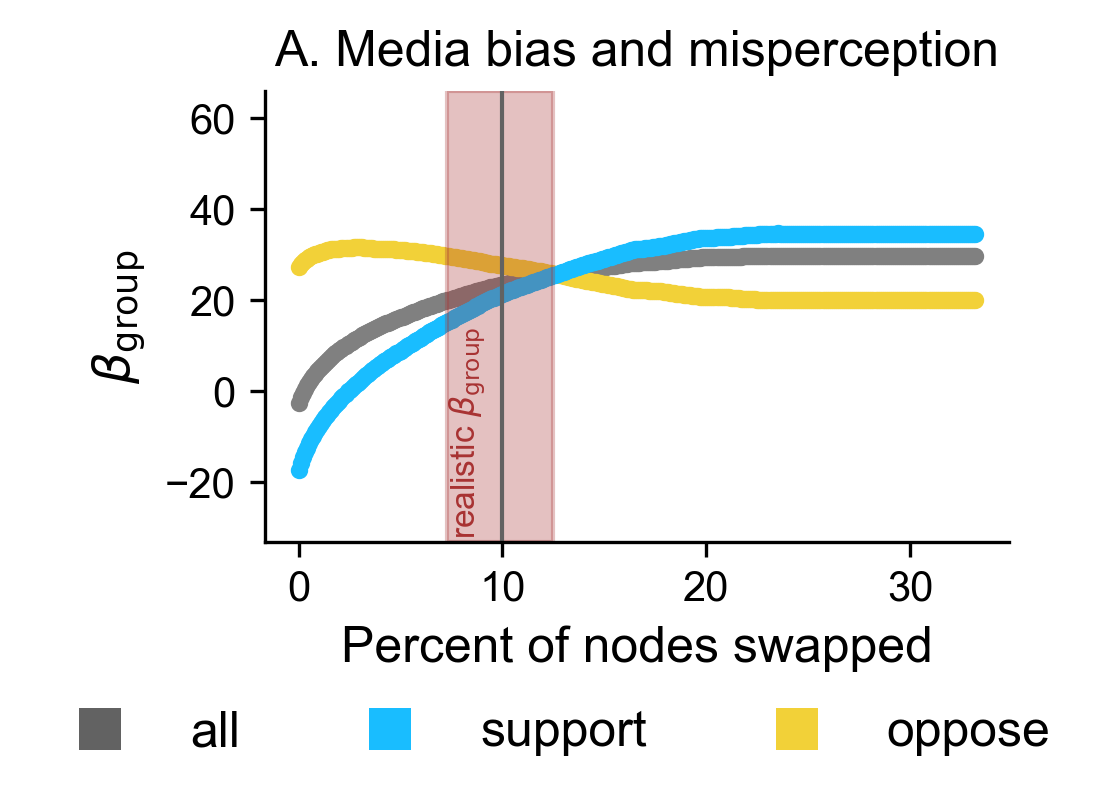

In [14]:

# Create a figure with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 1, figsize=(3.42, 2.5),dpi=300)



# plt.axvline(x=0.073, color=myblack, linestyle='-', linewidth=1)
x_with_beta_over_20 = 7.3


# Plot in the appropriate subplot (axes[i])
axes.scatter(df['swap_count']*100/num_agents, majority_percent-df['mean_opinion_percent'], color='grey', label='everyone',s=dot_size)
axes.scatter(df['swap_count']*100/num_agents, majority_percent-df['mean_minority_opinion_percent'], color=colors[1], label='oppose',s=dot_size)
axes.scatter(df['swap_count']*100/num_agents, majority_percent-df['mean_majority_opinion_percent'], color=colors[0], label='support',s=dot_size)


# Set labels, limits, and title for each subplot
axes.set_xlabel('Percent of nodes swapped')
plt.axvspan(x_with_beta_over_20, 12.5, color="#a83232", alpha=0.3, edgecolor=None)
plt.axvline(x=10, color=greycolor, linestyle='-', linewidth=1)
plt.text(7.3, -9, r"realistic $\beta_{\mathrm{group}}$", rotation=90, verticalalignment='center', fontsize=8, color="#a83232")


axes.set_ylabel(r'$\beta_{\mathrm{group}}$')
    #axes[i].legend(loc='upper right')
axes.set_ylim(-33,66)
axes.set_xticks([0,10,20, 30])
# axes.set_title('Seek out agreement with swaps'  +'\n (' + r'h='+f'{80 / 100})')
# Add legend in the upper right of each subplot

customize_plot(axis=axes)
axes.set_title("A. Media bias and misperception")


# Define custom legend handles with rectangular markers and no edges
handles = [
    Line2D([0], [0], color='none', marker='s', markersize=10, label='all', markerfacecolor='#626262', markeredgewidth=0),
    Line2D([0], [0], color='none', marker='s', markersize=10, label='support', markerfacecolor='#19bdff', markeredgewidth=0),
    Line2D([0], [0], color='none', marker='s', markersize=10, label='oppose', markerfacecolor='#f2d138', markeredgewidth=0)
]

# Create the legend with custom handles
fig.legend(handles=handles, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3, frameon=False)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig("../99_figures/single_panel_high_homophily_with_legend.pdf", format="pdf", bbox_inches="tight")
# Show the three-panel figure
plt.show()